# kNN k-Nearest Neighbors (Метод k-ближайших соседей)

Применение алгоритма kNN для решения задачи классификации.


### Датасет
Рассматривать задачу будем на примере известного датасета **Цветки Ириса**

Датасет [Цветки Ириса](https://archive.ics.uci.edu/ml/datasets/iris) содержит 150 записей, каждая из записей содержит 4 признака, т.е. $\boldsymbol x \in \mathbb{R}^4$. 

Что за 4 признака?

0. длина чашелистника, см
1. ширина чашелистника, см
2. длина лепестка, см 
3. ширина лепестка, см 

Метки классов

0. Setosa
1. Versicolour 
2. Virginica

## 0. Импорт библиотек

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn import datasets

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 1. Загружаем данные по цветкам ирисов

Для этого воспользуемся встроенным в библиотеке `scikit-learn` модулем `datasets`

In [4]:
iris = datasets.load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Информация по признакам
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# Информация по целевой переменной (классам цветка)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# Выведем информацию по размерности датасета и целевой переменной
# чтобы убедиться, что размерности совпадают
print('Размерность признакового пространства {}'.format(iris.data.shape))
print('Размерность вектора целевой переменной {}'.format(iris.target.shape))

Размерность признакового пространства (150, 4)
Размерность вектора целевой переменной (150,)


In [9]:
# Вынесем признаки и целевую перемнную в отдельные переменные
X = iris.data[:, :4] 
y = iris.target

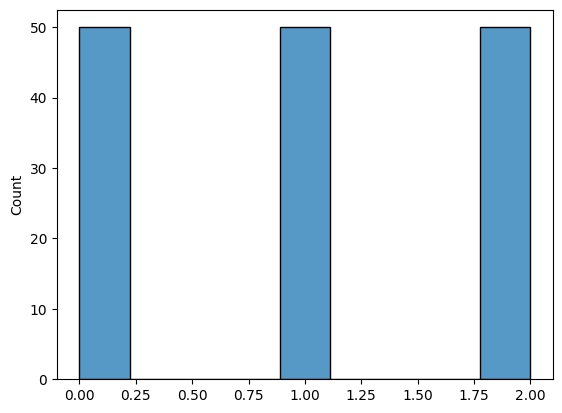

In [10]:
# Посмотрим на гистограмму распределения целевой переменной
sns.histplot(y);

Данные очень хорошо сбалансированы - каждого класса по 50 объектов.

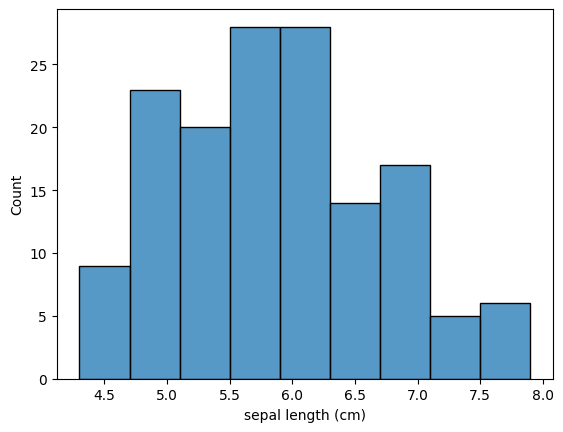

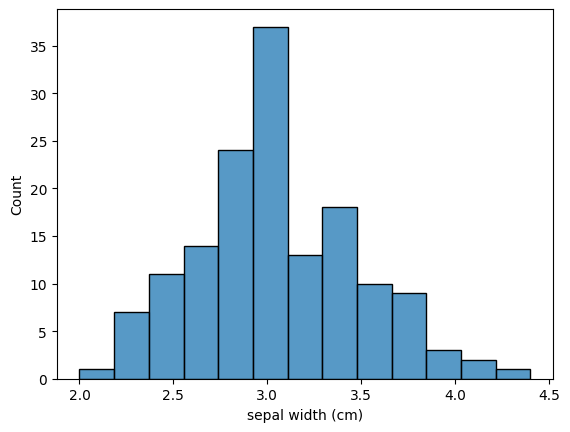

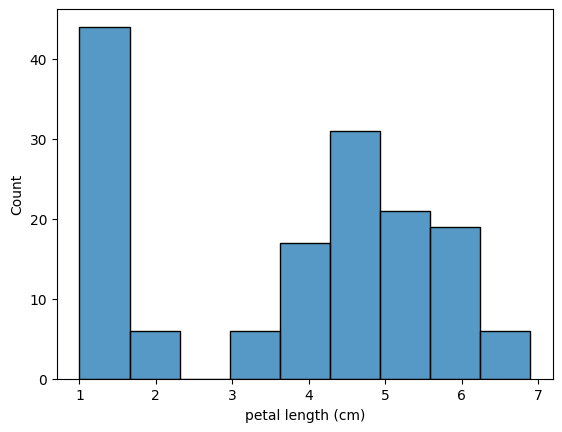

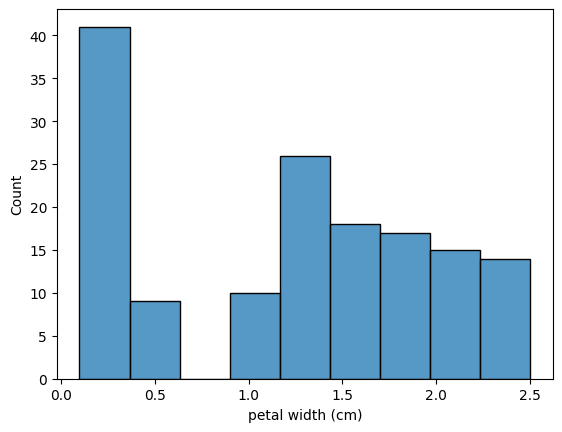

In [11]:
# Посмотрим на распределения признаков
for i in range(4):
    plt.figure
    sns.histplot(X[:,i]);
    plt.xlabel(iris.feature_names[i])
    plt.show()

## 2. Визуально изобразим данные

Для отображения в двумерном пространстве выберем параметры `длина чашелистика, см` и `длина лепестка, см`

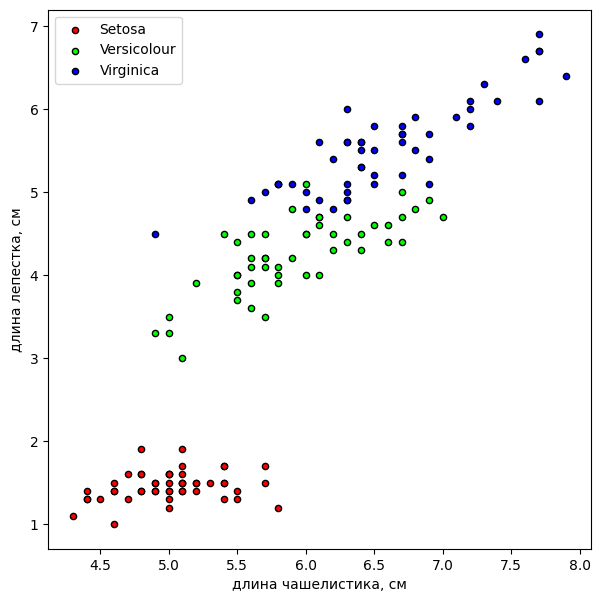

In [12]:
cmap_bold = ListedColormap(['#FF0000',  '#00FF00', '#0000FF'])

fig, ax = plt.subplots(figsize=(7,7))
for i, iris_class in enumerate(['Setosa', 'Versicolour', 'Virginica']):
    idx = y==i
    ax.scatter(X[idx,0], X[idx,2], 
               c=cmap_bold.colors[i], edgecolor='k', 
               s=20, label=iris_class);

ax.set(xlabel='длина чашелистика, см', ylabel='длина лепестка, см')
ax.legend();

# 3. Обучение модели

Теперь давайте попробуем обучить модель, которая будет на основании параметров цветка, определять к какому сорту относится этот цветок.

## 3.1. Обучение на всех данных

In [13]:
classifier_kNN = KNeighborsClassifier(n_neighbors=3)

classifier_kNN.fit(X, y)

y_pred = classifier_kNN.predict(X)

In [14]:
accuracy = accuracy_score(y, y_pred)*100
print('Точность модели равна на всей выборке ' + str(round(accuracy, 2)) + ' %.')

Точность модели равна на всей выборке 96.0 %.


## 3.2. Разбиение выборки на train и test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

При помощи функции `mean()` посчитайте среднее значение для параметра **sepal length (cm)**.

In [16]:
import numpy as np
mean_X_train_sepal_length = np.mean(X_train[:, 0])
mean_X_test_sepal_length = np.mean(X_test[:, 0])

# Разница между средними значениями
difference = round(abs(mean_X_train_sepal_length - mean_X_test_sepal_length), 2)
print('Модуль разности средних значений для X_train и X_test:', difference)

Модуль разности средних значений для X_train и X_test: 0.12


А теперь приступим к обучению модели на новом разбиении данных

In [17]:
classifier_kNN_robust = KNeighborsClassifier(n_neighbors=5)

classifier_kNN_robust.fit(X_train, y_train)

y_pred = classifier_kNN_robust.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Точность модели на тестовой выборке равна ' + str(round(accuracy, 2)) + ' %.')

Точность модели на тестовой выборке равна 96.67 %.


Найдите оптимальное количество соседей для алгоритма в диапазоне [2;40].

In [19]:
n_neighbours = range(2,41)
acc_list = []

for n_n in n_neighbours:
    model = KNeighborsClassifier(n_neighbors=n_n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

In [20]:
best_k = n_neighbours[acc_list.index(max(acc_list))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


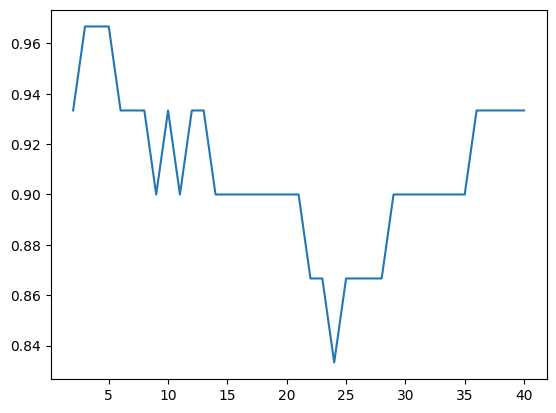

In [21]:
plt.plot(n_neighbours, acc_list)